In [66]:
import os
import numpy as np

import pycolmap
from megadepth.metrics.overlap import sparse_overlap

In [67]:
scene_info_path = "/Volumes/Extreme_SSD/MegaDepth/scene_info"
scenes_path = "/Volumes/Extreme_SSD/MegaDepth/scenes"

In [68]:
SCENE = "0022"
scene_info = np.load(os.path.join(scene_info_path, f"{SCENE}.npz"))
model = pycolmap.Reconstruction(os.path.join(scenes_path, SCENE, "sparse/baseline"))

In [69]:
scene_info.files

['image_paths',
 'depth_paths',
 'intrinsics',
 'poses',
 'overlap_matrix',
 'scale_ratio_matrix',
 'angles',
 'n_points3D',
 'points3D_id_to_2D',
 'points3D_id_to_ndepth']

In [70]:
gt_overlap = scene_info["overlap_matrix"]

In [71]:
overlap_matrix = sparse_overlap(model)

In [72]:
print(f"GT  overlap shape: {gt_overlap.shape}")
print(f"Our overlap shape: {overlap_matrix.shape}")
print(f"GT  mean overlap:  {np.mean(gt_overlap[gt_overlap > 0]):.4f}")
print(f"Our mean overlap:  {np.mean(overlap_matrix[overlap_matrix > 0]):.4f}")

GT  overlap shape: (1930, 1930)
Our overlap shape: (1930, 1930)
GT  mean overlap:  0.1314
Our mean overlap:  0.0985


In [73]:
scenes = []
gt_overlaps = []
our_overlaps = []
for scene in os.listdir(scenes_path):
    if scene.startswith("."):
        continue
    scene_info = np.load(os.path.join(scene_info_path, f"{scene}.npz"))
    model = pycolmap.Reconstruction(os.path.join(scenes_path, scene, "sparse/baseline"))
    overlap_matrix = sparse_overlap(model)
    mean_overlap = np.mean(overlap_matrix[overlap_matrix > 0])
    gt_overlap = np.mean(scene_info["overlap_matrix"] > 0)
    print("-" * 30)
    print(f"Scene: {scene}")
    print(f"GT  overlap shape: {scene_info['overlap_matrix'].shape}")
    print(f"Our overlap shape: {overlap_matrix.shape}")
    print(f"GT  mean overlap:  {gt_overlap:.4f}")
    print(f"Our mean overlap:  {mean_overlap:.4f}")

    scenes.append(scene)
    gt_overlaps.append(gt_overlap)
    our_overlaps.append(mean_overlap)

------------------------------
Scene: 0349
GT  overlap shape: (323, 323)
Our overlap shape: (323, 323)
GT  mean overlap:  0.0020
Our mean overlap:  0.1042
------------------------------
Scene: 0022
GT  overlap shape: (1930, 1930)
Our overlap shape: (1930, 1930)
GT  mean overlap:  0.0805
Our mean overlap:  0.0985
------------------------------
Scene: 0212
GT  overlap shape: (449, 449)
Our overlap shape: (449, 449)
GT  mean overlap:  0.0446
Our mean overlap:  0.0919
------------------------------
Scene: 0768
GT  overlap shape: (236, 236)
Our overlap shape: (236, 236)
GT  mean overlap:  0.0917
Our mean overlap:  0.0792
------------------------------
Scene: 0047
GT  overlap shape: (306, 306)
Our overlap shape: (306, 306)
GT  mean overlap:  0.0249
Our mean overlap:  0.1112
------------------------------
Scene: 0387
GT  overlap shape: (867, 867)
Our overlap shape: (867, 867)
GT  mean overlap:  0.0104
Our mean overlap:  0.1205
------------------------------
Scene: 0443
GT  overlap shape: (107

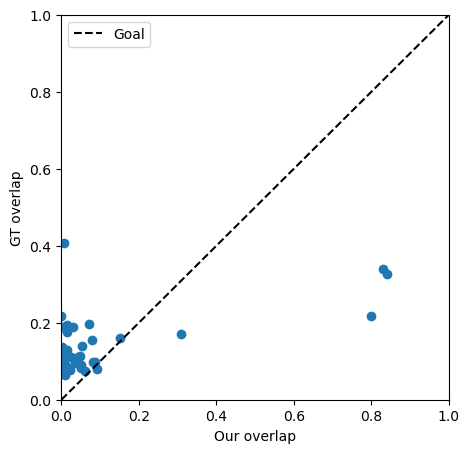

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(gt_overlaps, our_overlaps)
plt.plot([0, 1], [0, 1], "k--", label="Goal")
plt.ylabel("GT overlap")
plt.xlabel("Our overlap")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()